# Notebook to generate time averaged spectr data file

This notebook generates time average and standard deviations from mean square data files. There are for types.
1. Volume mean square and average
    * [vol_ave_prefix].dat
    * [vol_pwr_prefix]_s.dat
    * [vol_pwr_prefix]_m0.dat
    * [typical scale prefix].dat
2. Volume power spectra
    * [vol_pwr_prefix]_l.dat
    * [vol_pwr_prefix]_m.dat
    * [vol_pwr_prefix]_lm.dat
3. Layerd mean and average
    * [layer pwr prefix]_s.dat
    * [layer pwr prefix]_m0.dat
4. Layerd power spectra
    * [layer pwr prefix]_l.dat
    * [layer pwr prefix]_m.dat
    * [layer pwr prefix]_lm.dat

In addition, small plotting routines for the time and volume averaged power spectrum is also included.

## Initial setup

In [1]:
import sys
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
from ctypes import *

Move current directory to directory with data to be averaged

In [2]:
%cd ./

/Volumes/Sources/matsui/Kemorin_MHD/pythons


Check if shared libraly to load is there

In [3]:
%ls -l "libcalypso_to_pythons.so"

-rwxr-xr-x  1 matsui  staff  150613 Jun 10 15:42 libcalypso_to_pythons.so*


Load dynamic library to run the program

In [4]:
libname = "libcalypso_to_pythons.so"
flib = cdll.LoadLibrary(libname)

## Go to data directory

Move current directory to directory with data to be averaged

In [5]:
cd ~/Desktop/sph_shell_456/monitor

/Users/matsui/Desktop/sph_shell_456/monitor


Check if data file to be averaged is there

In [6]:
ls -l

total 1764116
-rw-r--r--  1 matsui  staff          0 Jun  8 19:40  Nusselt.dat
-rw-rw-r--  1 matsui  staff     602115 May  9 02:30 Nusselt.dat
-rw-r--r--@ 1 matsui  staff        970 Jun  9 09:38 control_sph_time_average
-rw-r--r--  1 matsui  staff        155 Jun  8 19:51 control_sph_time_average~
-rw-rw-r--  1 matsui  staff     441092 May  9 02:30 dipolarity.dat
-rw-rw-r--  1 matsui  staff     819114 May  9 02:30 gauss_coefs_Re.dat
-rw-rw-r--  1 matsui  staff    2849572 May  9 02:30 sph_ave_volume.dat
-rw-rw-r--  1 matsui  staff  311136492 May  9 02:30 sph_pwr_layer_l.dat
-rw-rw-r--  1 matsui  staff  311136500 May  9 02:30 sph_pwr_layer_lm.dat
-rw-rw-r--  1 matsui  staff  311136491 May  9 02:30 sph_pwr_layer_m.dat
-rw-rw-r--  1 matsui  staff    3129484 May  9 02:30 sph_pwr_layer_m0.dat
-rw-rw-r--  1 matsui  staff    3129484 May  9 02:30 sph_pwr_layer_s.dat
-rw-rw-r--  1 matsui  staff  284928582 May  9 02:30 sph_pwr_volume_l.dat
-rw-rw-r--  1 matsui  staff  284928590 May  9 02:30 sph_pw

## Time averaging for volume mean square and average

The folowing moniter data files can be treated in this block
1. Volume average data [vol_ave_prefix].dat
2. Volume mean square data [vol_pwr_prefix]_s.dat
3. Volume mean square data for axissymmetric component [vol_pwr_prefix]_m0.dat
4. Typical scale data [typical scale prefix].dat


Set file prefix (excluding ".dat") to be averaged as file_prefix, start time as start_time, and end time as end_time.

In [7]:
file_prefix = "sph_pwr_volume_s"
start_time = 5.0
end_time =  12.0

Start time average program for volume spectrum data. Results are shown in the standard output, and the following files will be generated.
1. Time average data will be "t_ave_[file_prefix].dat",
2. Standard deviation will be "t_sigma_[file_prefix].dat".

In [8]:
flib.time_ave_sdev_sph_volume_pwr_c.restype = c_int
flib.time_ave_sdev_sph_volume_pwr_c.argtypes = [c_char_p, c_double, c_double]

n = flib.time_ave_sdev_sph_volume_pwr_c(file_prefix.encode(), c_double(start_time), c_double(end_time))

 Open file sph_pwr_volume_s.dat
           1 t_step
           2 time
           3 K_ene_pol
           4 K_ene_tor
           5 K_ene
           6 temperature
           7 pressure
           8 vorticity_pol
           9 vorticity_tor
          10 vorticity
          11 M_ene_pol
          12 M_ene_tor
          13 M_ene
          14 current_density_pol
          15 current_density_tor
          16 current_density
          17 buoyancy_flux
          18 Lorentz_work

 Open file sph_pwr_volume_s.dat again

Start and end time:        5.001999999979800E+000   1.200199999971480E+001
 Time_average, standard_deviation, field_name
 1.124968193985901E+002 1.724354485456676E+001    K_ene_pol
 3.256953131006878E+002 6.533648321495633E+001    K_ene_tor
 4.381921324992790E+002 7.940593759074467E+001    K_ene
 3.900325179737186E-002 1.498824868699157E-003    temperature
 1.011183309530280E+002 3.347082592375858E+001    pressure
 6.545558538309260E+004 9.747288735158802E+003    vorticity_pol
 4.164

## Time averaging for volume power spectra

The folowing moniter data files can be treated in this block
1. Volume power specta data 
    * [vol_pwr_prefix]_l.dat
    * [vol_pwr_prefix]_m.dat
    * [vol_pwr_prefix]_lm.dat

Set file prefix (excluding ".dat") to be averaged as file_prefix, start time as start_time, and end time as end_time.

In [9]:
file_prefix = "sph_pwr_volume_lm"
start_time = 5.0
end_time =  12.0

Start time average program for volume spectrum data. The following files will be generated.
1. Time average data will be "t_ave_[file_prefix].dat",
2. Standard deviation will be "t_sigma_[file_prefix].dat".

In [10]:
flib.time_ave_sdev_sph_vol_spectr_c.restype = c_int
flib.time_ave_sdev_sph_vol_spectr_c.argtypes = [c_char_p, c_double, c_double]

n = flib.time_ave_sdev_sph_vol_spectr_c(file_prefix.encode(), c_double(start_time), c_double(end_time))

 Open file sph_pwr_volume_lm.dat
           1 t_step
           2 time
           3 diff_deg_order
           4 K_ene_pol
           5 K_ene_tor
           6 K_ene
           7 temperature
           8 pressure
           9 vorticity_pol
          10 vorticity_tor
          11 vorticity
          12 M_ene_pol
          13 M_ene_tor
          14 M_ene
          15 current_density_pol
          16 current_density_tor
          17 current_density
          18 buoyancy_flux
          19 Lorentz_work

 Open file sph_pwr_volume_lm.dat again

Start and end time:        5.001999999979800E+000   1.200199999971480E+001


## Time averaging for layerd mean square and average

The folowing moniter data files can be treated in this block
1. Layerd mean square data [layer pwr prefix]_s.dat
2. Layerd mean square data for axissymmetric component [layer pwr prefix]_m0.dat

Set file prefix (excluding ".dat") to be averaged as file_prefix, start time as start_time, and end time as end_time.

In [11]:
file_prefix = "sph_pwr_layer_s"
start_time = 5.0
end_time =  12.0

Start time average program for volume spectrum data. The following files will be generated.
1. Time average data will be "t_ave_[file_prefix].dat",
2. Standard deviation will be "t_sigma_[file_prefix].dat".

In [12]:
flib.time_ave_sdev_sph_layer_pwr_c.restype = c_int
flib.time_ave_sdev_sph_layer_pwr_c.argtypes = [c_char_p, c_double, c_double]

n = flib.time_ave_sdev_sph_layer_pwr_c(file_prefix.encode(), c_double(start_time), c_double(end_time))

 Open file sph_pwr_layer_s.dat
           1 t_step
           2 time
           3 radial_id
           4 radius
           5 K_ene_pol
           6 K_ene_tor
           7 K_ene
           8 temperature
           9 pressure
          10 vorticity_pol
          11 vorticity_tor
          12 vorticity
          13 M_ene_pol
          14 M_ene_tor
          15 M_ene
          16 current_density_pol
          17 current_density_tor
          18 current_density
          19 buoyancy_flux
          20 Lorentz_work

 Open file sph_pwr_layer_s.dat again

Start and end time:        5.001999999979800E+000   1.200199999971480E+001


## Time averaging for layerd power spectra


The folowing moniter data files can be treated in this block
1. Layerd power specta data [layer pwr prefix]_l.dat, [layer pwr prefix]_l.dat, [layer pwr prefix]_lm.dat


Set file prefix (excluding ".dat") to be averaged as file_prefix, start time as start_time, and end time as end_time.

In [13]:
file_prefix = "sph_pwr_layer_lm"
start_time = 5.0
end_time =  12.0

Start time average program for volume spectrum data. The following files will be generated.
1. Time average data will be "t_ave_[file_prefix].dat",
2. Standard deviation will be "t_sdev_[file_prefix].dat".

In [14]:
flib.time_ave_sdev_sph_layer_spec_c.restype = c_int
flib.time_ave_sdev_sph_layer_spec_c.argtypes = [c_char_p, c_double, c_double]

n = flib.time_ave_sdev_sph_layer_spec_c(file_prefix.encode(), c_double(start_time), c_double(end_time))

 Open file sph_pwr_layer_lm.dat
           1 t_step
           2 time
           3 radial_id
           4 radius
           5 diff_deg_order
           6 K_ene_pol
           7 K_ene_tor
           8 K_ene
           9 temperature
          10 pressure
          11 vorticity_pol
          12 vorticity_tor
          13 vorticity
          14 M_ene_pol
          15 M_ene_tor
          16 M_ene
          17 current_density_pol
          18 current_density_tor
          19 current_density
          20 buoyancy_flux
          21 Lorentz_work

 Open file sph_pwr_layer_lm.dat again

Start and end time:        5.001999999979800E+000   1.200199999971480E+001


## Check time average data (Optional)
These are very simple output to look at the time average and standard deviation data output. Please be careful to display large size data.

In [11]:
average_file = "t_ave_" + file_prefix + ".dat"
f = open(average_file, 'r', encoding='UTF-8')
data = f.read()
print(data)
f.close()

radial_layers, truncation
               1              95
ICB_id, CMB_id
               1              96
Lower boudary
               1  3.33333333333333E-001
Upper boundary
              96  1.33333333333333E+000
number of components
               8              16
    3    1    1    3    3    3    1    1
t_step    time    K_ene_pol    K_ene_tor    K_ene    temperature    pressure    vorticity_pol    vorticity_tor    vorticity    M_ene_pol    M_ene_tor    M_ene    current_density_pol    current_density_tor    current_density    buoyancy_flux    Lorentz_work    
         1200200   1.200199999971480E+001   0.000000000000000E+000   0.000000000000000E+000   0.000000000000000E+000   1.373834530505008E-001   2.096553986933392E+000   0.000000000000000E+000   0.000000000000000E+000   0.000000000000000E+000   0.000000000000000E+000   0.000000000000000E+000   0.000000000000000E+000   0.000000000000000E+000   0.000000000000000E+000   0.000000000000000E+000   1.067049377272905E+005  -4.7398244

Check standard deviation data (Optional)

In [12]:
average_file = "t_sigma_" + file_prefix + ".dat"
f = open(average_file, 'r', encoding='UTF-8')
data = f.read()
print(data)
f.close()

radial_layers, truncation
               1              95
ICB_id, CMB_id
               1              96
Lower boudary
               1  3.33333333333333E-001
Upper boundary
              96  1.33333333333333E+000
number of components
               8              16
    3    1    1    3    3    3    1    1
t_step    time    K_ene_pol    K_ene_tor    K_ene    temperature    pressure    vorticity_pol    vorticity_tor    vorticity    M_ene_pol    M_ene_tor    M_ene    current_density_pol    current_density_tor    current_density    buoyancy_flux    Lorentz_work    
         1200200   1.200199999971480E+001   0.000000000000000E+000   0.000000000000000E+000   0.000000000000000E+000   2.432155419959122E-003   1.885901838486531E-001   0.000000000000000E+000   0.000000000000000E+000   0.000000000000000E+000   0.000000000000000E+000   0.000000000000000E+000   0.000000000000000E+000   0.000000000000000E+000   0.000000000000000E+000   0.000000000000000E+000   1.555206349636548E+004   3.1152519

## Simple XY plot for thime averaged volume spectrum
Here is a very simple program to make a time averaged power spectrum plot frem obtained results. There are a lot of room to improve the image quality.

In [15]:
file_prefix = "sph_pwr_volume_lm"
tave_file_prefix = "t_ave_" +   file_prefix
sdev_file_prefix = "t_sigma_" + file_prefix

flib.read_tave_sdev_sph_vol_spec_c.restype = c_int
flib.read_tave_sdev_sph_vol_spec_c.argtypes = [c_char_p, c_char_p]
truncation = flib.read_tave_sdev_sph_vol_spec_c(tave_file_prefix.encode(), sdev_file_prefix.encode())

print("Truncation level:", truncation)


 Open file t_ave_sph_pwr_volume_lm.dat again
           1 t_step
           2 time
           3 diff_deg_order
           4 K_ene_pol
           5 K_ene_tor
           6 K_ene
           7 temperature
           8 pressure
           9 vorticity_pol
          10 vorticity_tor
          11 vorticity
          12 M_ene_pol
          13 M_ene_tor
          14 M_ene
          15 current_density_pol
          16 current_density_tor
          17 current_density
          18 buoyancy_flux
          19 Lorentz_work
 Open file t_sigma_sph_pwr_volume_lm.dat again
           1 t_step
           2 time
           3 diff_deg_order
           4 K_ene_pol
           5 K_ene_tor
           6 K_ene
           7 temperature
           8 pressure
           9 vorticity_pol
          10 vorticity_tor
          11 vorticity
          12 M_ene_pol
          13 M_ene_tor
          14 M_ene
          15 current_density_pol
          16 current_density_tor
          17 current_density
          18 buoyancy_flu

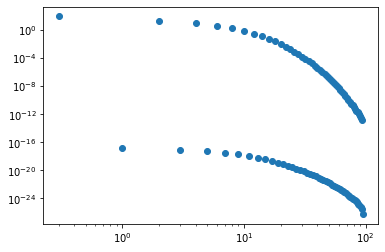

In [16]:
# Set truncation for plot
ltr = truncation
# Set component name to be plotted
field_name = "K_ene_pol"

# Initialize arrays
lx =         np.zeros((ltr+1))
ave_spec =   np.zeros((ltr+1))
sdev_spec =  np.zeros((ltr+1))

# Load time average and standard deviation
flib.load_field_labels_f.restype = c_void_p
flib.load_field_labels_f.argtypes = [c_int, c_char_p, np.ctypeslib.ndpointer(dtype=np.float64),
                                     np.ctypeslib.ndpointer(dtype=np.float64)]

flib.load_field_labels_f(c_int(ltr), field_name.encode(), ave_spec, sdev_spec)

# Set modes for horiziontal axis
for i in range(ltr+1):
  lx[i] = i
#  Plot degree 0 at x = 0.3 in log scale
lx[0] = 0.3

#  Start plotting
# plt.plot(lx,ave_spec)
plt.scatter(lx,ave_spec)
# plt.errorbar(lx, ave_spec, yerr=sdev_spec, lolims=True,)

plt.xscale('log')
plt.yscale('log')

plt.show()